In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.read_csv(r'D:/saikrishna data science/hackthon/data.csv')

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [3]:
Movies = pd.read_csv(r'D:/saikrishna data science/hackthon/data.csv')

In [4]:
Movies.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [5]:
Movies.drop(columns=['Movie Info','Unnamed: 0'],inplace=True,axis=1)

In [6]:
Movies.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [7]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Distributor                 918 non-null    object
 2   Release Date                800 non-null    object
 3   Domestic Sales (in $)       918 non-null    int64 
 4   International Sales (in $)  918 non-null    int64 
 5   World Sales (in $)          918 non-null    int64 
 6   Genre                       918 non-null    object
 7   Movie Runtime               918 non-null    object
 8   License                     744 non-null    object
dtypes: int64(3), object(6)
memory usage: 64.7+ KB


In [8]:
Movies['License'].fillna('PG-13',inplace=True)

In [9]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Distributor                 918 non-null    object
 2   Release Date                800 non-null    object
 3   Domestic Sales (in $)       918 non-null    int64 
 4   International Sales (in $)  918 non-null    int64 
 5   World Sales (in $)          918 non-null    int64 
 6   Genre                       918 non-null    object
 7   Movie Runtime               918 non-null    object
 8   License                     918 non-null    object
dtypes: int64(3), object(6)
memory usage: 64.7+ KB


In [10]:
Movies1=Movies.dropna(axis=0)

In [11]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,Titanic (1997),Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,Jurassic World (2015),Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13


In [12]:
Movies1['Release Date'] = pd.to_datetime(Movies1['Release Date'],dayfirst = False,yearfirst= False)

In [13]:
Movies1['Movie Runtime'] = Movies1['Movie Runtime'].apply(lambda x:x.replace('hr',""))

In [14]:
Movies1['Movie Runtime'] = Movies1['Movie Runtime'].apply(lambda x:x.replace('min',""))

In [15]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 18,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 1,PG-13
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 42,PG-13
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 14,PG-13
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 4,PG-13


In [16]:
Movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Title                       800 non-null    object        
 1   Distributor                 800 non-null    object        
 2   Release Date                800 non-null    datetime64[ns]
 3   Domestic Sales (in $)       800 non-null    int64         
 4   International Sales (in $)  800 non-null    int64         
 5   World Sales (in $)          800 non-null    int64         
 6   Genre                       800 non-null    object        
 7   Movie Runtime               800 non-null    object        
 8   License                     800 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 62.5+ KB


In [17]:
l=[]
for i in Movies1['Movie Runtime']: 
    l.append((int(i.split()[0])*60))

In [18]:
Movies1['Movie Runtime1'] = l

In [19]:
Movies1

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime1
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 18,PG-13,120
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 1,PG-13,180
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 42,PG-13,120
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 14,PG-13,180
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 4,PG-13,120
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,"['Drama', 'Romance']",2 3,PG-13,120
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,2001-12-21,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 22,PG-13,60
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 13,PG-13,120
916,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,"['Crime', 'Horror']",1 38,R,60


In [20]:
m=[]
for i in Movies1['Movie Runtime']: 
    m.append(i.replace(i.split()[0],''))

In [21]:
Movies1['Movie Runtime2'] = m

In [22]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime1,Movie Runtime2
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 18,PG-13,120,18
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 1,PG-13,180,1
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 42,PG-13,120,4
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 14,PG-13,180,14
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 4,PG-13,120,4


In [23]:
Movies1['Movie Runtime2'] = Movies1['Movie Runtime2'].apply(lambda x:x.replace(' ',""))

In [24]:
Movies1['Movie Runtime2'].unique()

array(['18', '1', '4', '14', '3', '58', '13', '9', '43', '16', '44', '33',
       '55', '40', '6', '31', '28', '8', '10', '7', '', '59', '42', '0',
       '21', '27', '38', '46', '48', '35', '17', '34', '19', '15', '49',
       '11', '5', '47', '36', '32', '37', '57', '25', '30', '29', '41',
       '45', '53', '56', '24', '26', '52', '50', '2', '54', '39', '22',
       '23'], dtype=object)

In [25]:
n=[]
for i in Movies1['Movie Runtime2']:
    if i=="":
        n.append(0)
    else:
        n.append(i)

In [26]:
Movies1['Movie Runtime3'] = n

In [27]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime1,Movie Runtime2,Movie Runtime3
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 18,PG-13,120,18,18
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 1,PG-13,180,1,1
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 42,PG-13,120,4,4
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 14,PG-13,180,14,14
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 4,PG-13,120,4,4


In [28]:
Movies1['Movie Runtime3'].unique()

array(['18', '1', '4', '14', '3', '58', '13', '9', '43', '16', '44', '33',
       '55', '40', '6', '31', '28', '8', '10', '7', 0, '59', '42', '0',
       '21', '27', '38', '46', '48', '35', '17', '34', '19', '15', '49',
       '11', '5', '47', '36', '32', '37', '57', '25', '30', '29', '41',
       '45', '53', '56', '24', '26', '52', '50', '2', '54', '39', '22',
       '23'], dtype=object)

In [29]:
Movies1['Movie Runtime3'] = Movies1['Movie Runtime3'].astype(str).astype('int64')

In [30]:
Movies1['Movie Runtime4'] = Movies1['Movie Runtime1']+Movies1['Movie Runtime3']

In [31]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime1,Movie Runtime2,Movie Runtime3,Movie Runtime4
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 18,PG-13,120,18,18,138
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 1,PG-13,180,1,1,181
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 42,PG-13,120,4,4,124
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 14,PG-13,180,14,14,194
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 4,PG-13,120,4,4,124


In [32]:
Movies1.drop(columns=['Movie Runtime1','Movie Runtime2','Movie Runtime3','Movie Runtime'],inplace=True,axis=1)

In [33]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime4
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",PG-13,138
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",PG-13,181
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,124
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",PG-13,194
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",PG-13,124


In [34]:
Movies1['Release Date'] = Movies1['Release Date'].astype('datetime64[ns]').astype('str')

In [35]:
Movies1['Release Year'] = Movies1['Release Date'].apply(lambda x:re.search('\d+',x).group())

In [36]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime4,Release Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,124,2009
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",PG-13,124,2015


In [37]:
Movies1['Genre'] = Movies1['Genre'].apply(lambda x:x.replace('[',""))

In [38]:
Movies1['Genre'] = Movies1['Genre'].apply(lambda x:x.replace(']',""))

In [39]:
Movies1['Genre'] = Movies1['Genre'].apply(lambda x:x.replace(',',""))

In [40]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime4,Release Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015


In [41]:
Movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       800 non-null    object
 1   Distributor                 800 non-null    object
 2   Release Date                800 non-null    object
 3   Domestic Sales (in $)       800 non-null    int64 
 4   International Sales (in $)  800 non-null    int64 
 5   World Sales (in $)          800 non-null    int64 
 6   Genre                       800 non-null    object
 7   License                     800 non-null    object
 8   Movie Runtime4              800 non-null    int64 
 9   Release Year                800 non-null    object
dtypes: int64(4), object(6)
memory usage: 68.8+ KB


In [42]:
Movies1['Domestic Sales (in $)'] = Movies1['Domestic Sales (in $)'].astype(float)

In [43]:
Movies1['International Sales (in $)'] = Movies1['International Sales (in $)'].astype(float)

In [44]:
Movies1['World Sales (in $)'] = Movies1['World Sales (in $)'].astype(float)

In [45]:
Movies1.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime4,Release Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,1997-12-19,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,2015-06-10,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015


In [46]:
Movies1.drop(columns=['Release Date'],inplace=True,axis=1)

In [47]:
Movies1.rename(columns={'Movie Runtime4':'Movie Runtime','Release Year':'Movie Releases Year'},inplace=True)

## FINAL DATASET AFTER DATA CLEANING

In [48]:
Movies1.head()

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015


## STATISTICS

In [49]:
Movies1.mean()

Domestic Sales (in $)         1.688992e+08
International Sales (in $)    2.315252e+08
World Sales (in $)            4.000684e+08
Movie Runtime                 1.134550e+02
Movie Releases Year                    inf
dtype: float64

In [50]:
Movies1.describe(include=object)

,Title,Distributor,Genre,License,Movie Releases Year
count,800,800,800,800,800
unique,800,32,272,4,47
top,Star Wars: Episode VII - The Force Awakens (2015),Warner Bros.,'Action' 'Adventure' 'Sci-Fi',PG-13,2014
freq,1,131,52,419,41


In [51]:
Movies1.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime
count,8.000000e+02,8.000000e+02,8.000000e+02,800.000000
mean,1.688992e+08,2.315252e+08,4.000684e+08,113.455000
std,1.017721e+08,2.152804e+08,3.031155e+08,21.817206
min,8.036084e+07,2.600000e+02,8.260470e+07,62.000000
25%,1.026820e+08,9.302253e+07,2.045239e+08,99.000000
50%,1.340497e+08,1.675307e+08,3.103153e+08,115.000000
75%,1.956414e+08,2.894733e+08,4.827288e+08,125.000000
max,9.366622e+08,2.086739e+09,2.847246e+09,201.000000


## Domestic Sales
- The minimum domestic sales grosser is 8 crores.
- The maximum domestic sales is grosser 93 crores.
- The domestic sales of grosser are between 8 crores to 93 crores.

## International Sales
- The minimum International Sales grosser is 2.6 crores.
- The maximum International Sales grosser is 2086 crores.
- The International sales of grosser are between 26 crores to 2086 crores.

## World Sales
- The minimum World Sales grosser is 8 crores.
- The maximum World Sales grosser is 2847 crores.
- The World sales of grosser are between 8 crores to 2847 crores.

##  Movie Runtime
- The minimum movie runtime is 62 minutes.
- The maximun movie runtime is 200 minutes.
- The range oof movie runtime is 60 to 200 minutes.

In [52]:
Movies1.corr()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime
Domestic Sales (in $),1.000000,0.792538,0.901854,0.218295
International Sales (in $),0.792538,1.000000,0.977177,0.265737
World Sales (in $),0.901854,0.977177,1.000000,0.262774
Movie Runtime,0.218295,0.265737,0.262774,1.000000


## Exploratory data analysis

## UNI-VARIANT

## Movies which grossers more than 100 crores in World Sales

In [53]:
Movies2=Movies1[Movies1['World Sales (in $)'] > 1000000000]

In [54]:
Movies2

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910.0,8.954576e+08,1.518816e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,123,2012
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
12,The Dark Knight (2008),Warner Bros.,534858444.0,4.711152e+08,1.005974e+09,'Action' 'Crime' 'Drama' 'Thriller',PG-13,123,2008
13,Rogue One: A Star Wars Story (2016),Walt Disney Studios Motion Pictures,532177324.0,5.238804e+08,1.056058e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,133,2016


In [55]:
Movies2['Movie Releases Year'].value_counts()

2019    9
2015    5
2017    4
2012    3
2010    2
2011    2
2016    2
2013    2
2001    1
2003    1
1993    1
2006    1
2018    1
1994    1
1999    1
2008    1
1997    1
2009    1
2014    1
Name: Movie Releases Year, dtype: int64

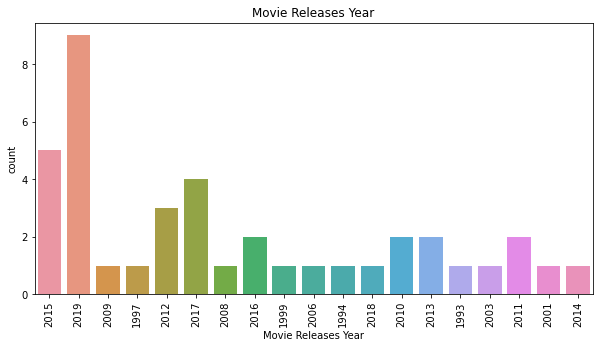

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='Movie Releases Year',data=Movies2)
plt.xticks(rotation=90)
plt.title('Movie Releases Year')
plt.show()

## Movies in Most Of the Year
- 2019 year has most highest grosser movies.
- 2015,2017 and 2019 has high grosser movies
- This movies are crossed 100 crores grossers in their particular years.

## Highest Grosser movies with Distributor

In [57]:
Movies2['Distributor'].value_counts()

Walt Disney Studios Motion Pictures    21
Universal Pictures                      7
Warner Bros.                            4
Twentieth Century Fox                   2
Paramount Pictures                      2
Sony Pictures Entertainment (SPE)       2
New Line Cinema                         1
DreamWorks                              1
Name: Distributor, dtype: int64

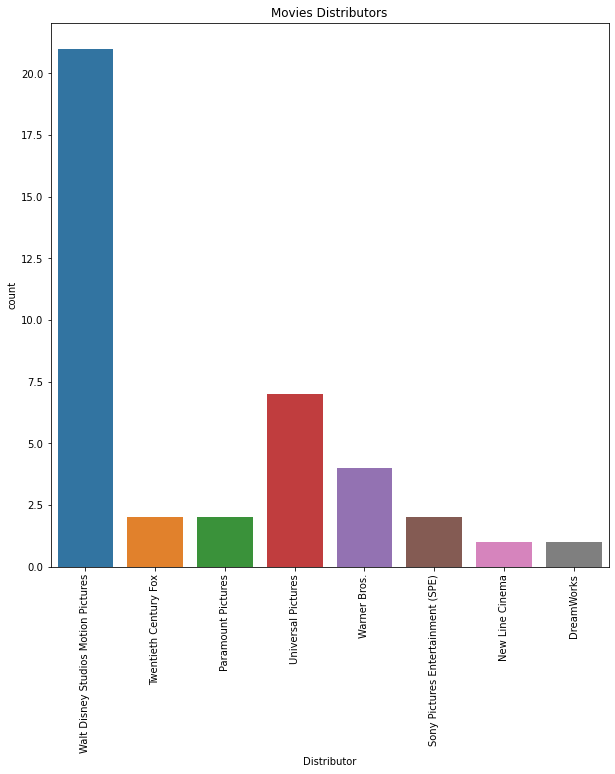

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x='Distributor',data=Movies2)
plt.xticks(rotation=90,fontsize = 10)
plt.title('Movies Distributors')
plt.show()

- Walt Disney Studios Motion Pictures gets highest grosser movies which is more than  100 crores.
- Walt Disney Studios Motion Pictures and Universal Pictures gets highest grosser movies.
- New Line Cinema and DreamWorks gets less higher grosser movies.

## Highest Grosser movies their runtime

In [59]:
Movies2['Movie Runtime'].value_counts()

123    6
129    2
124    2
128    2
137    2
121    2
127    2
103    2
136    2
154    1
201    1
138    1
63     1
120    1
108    1
89     1
102    1
151    1
130    1
88     1
181    1
100    1
164    1
133    1
118    1
194    1
165    1
Name: Movie Runtime, dtype: int64

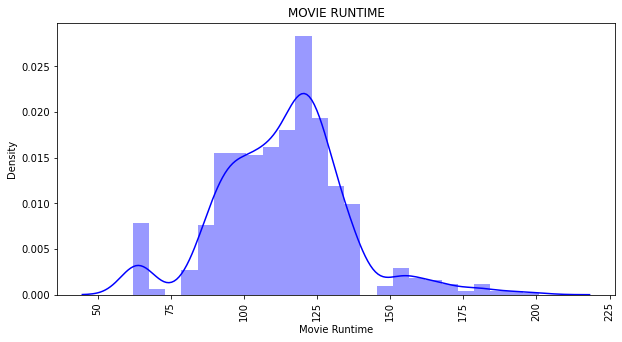

In [77]:
plt.figure(figsize=(10,5))
sns.distplot(Movies1['Movie Runtime'],kde=True,color='blue')
plt.xticks(rotation=90,fontsize = 10)
plt.title('MOVIE RUNTIME')
plt.show()

- The most of the used runtime is 123 min
- The most of the movies runtime are range between 121 to 129. 

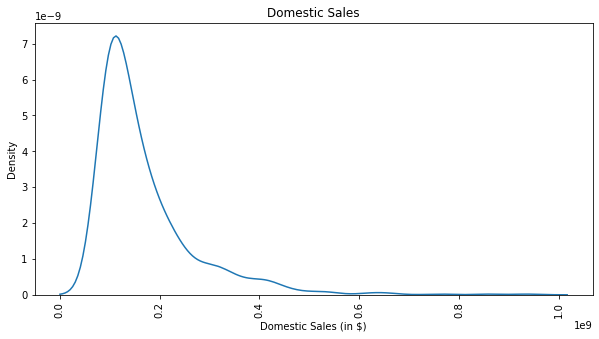

In [78]:
plt.figure(figsize=(10,5))
sns.kdeplot(Movies1['Domestic Sales (in $)'])
plt.xticks(rotation=90,fontsize = 10)
plt.title('Domestic Sales')
plt.show()

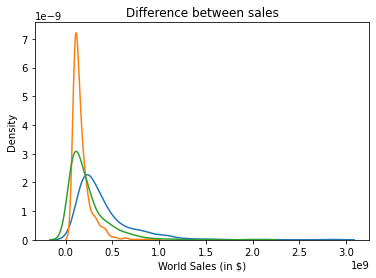

In [79]:
sns.kdeplot(Movies1['World Sales (in $)'])
sns.kdeplot(Movies1['Domestic Sales (in $)'])
sns.kdeplot(Movies1['International Sales (in $)'])
plt.title('Difference between sales')
plt.show()

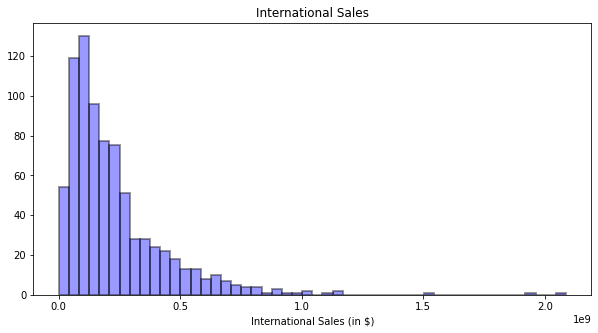

In [80]:
plt.figure(figsize=(10,5))
sns.distplot(Movies1['International Sales (in $)'],kde=False,hist_kws=dict(edgecolor="black", linewidth=2,color='blue'))
plt.title('International Sales')
plt.show()

## Movies which grossers more than 50 crores in Domestic Sales

In [62]:
Movies3=Movies1[Movies1['Domestic Sales (in $)'] > 500000000]


In [63]:
Movies3

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910.0,8.954576e+08,1.518816e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,123,2012
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
12,The Dark Knight (2008),Warner Bros.,534858444.0,4.711152e+08,1.005974e+09,'Action' 'Crime' 'Drama' 'Thriller',PG-13,123,2008
13,Rogue One: A Star Wars Story (2016),Walt Disney Studios Motion Pictures,532177324.0,5.238804e+08,1.056058e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,133,2016


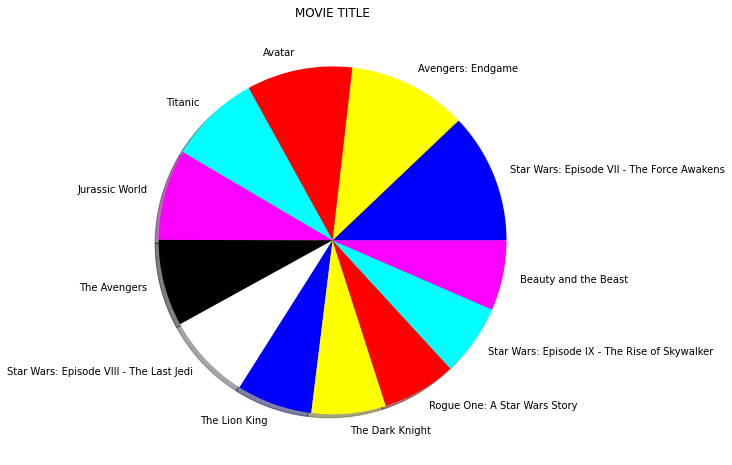

In [64]:
plt.figure(figsize=(10,8))
Title = ['Star Wars: Episode VII - The Force Awakens','Avengers: Endgame','Avatar','Titanic','Jurassic World','The Avengers','Star Wars: Episode VIII - The Last Jedi','The Lion King','The Dark Knight ','Rogue One: A Star Wars Story','Star Wars: Episode IX - The Rise of Skywalker','Beauty and the Beast ']
sales = [936662225.0,858373000.0,760507625.0,659363944.0,652385625.0,623357910.0,620181382.0,543638043.0,534858444.0,532177324.0,515202542.0,504481165.0]
plt.pie(sales,labels=Title,colors = ['blue','yellow','red','cyan','magenta','black','white',],shadow=True)
plt.title('MOVIE TITLE')
plt.show()

- Star Wars: Episode VII - The Force Awakens grossers highest among all the movies in domestic sales.
- Beauty and the Beast grossers least in among all movies in domestic sales.
- This movies have domestic sales between 100 crores to 50 crores

## License

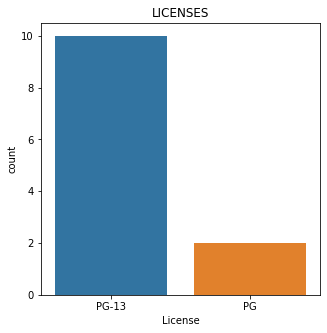

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x='License',data=Movies3)
plt.title('LICENSES')
plt.show()

- Most movies are PG-13 license
- Less movies have PG license

## BI-VARIANT

## Comparing Movie Title with Domestic Sales

In [116]:
Movies4=Movies1.sort_values(by='Domestic Sales (in $)',ascending=False)
m = Movies2.head(50)

In [117]:
m

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910.0,8.954576e+08,1.518816e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,123,2012
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
12,The Dark Knight (2008),Warner Bros.,534858444.0,4.711152e+08,1.005974e+09,'Action' 'Crime' 'Drama' 'Thriller',PG-13,123,2008
13,Rogue One: A Star Wars Story (2016),Walt Disney Studios Motion Pictures,532177324.0,5.238804e+08,1.056058e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,133,2016


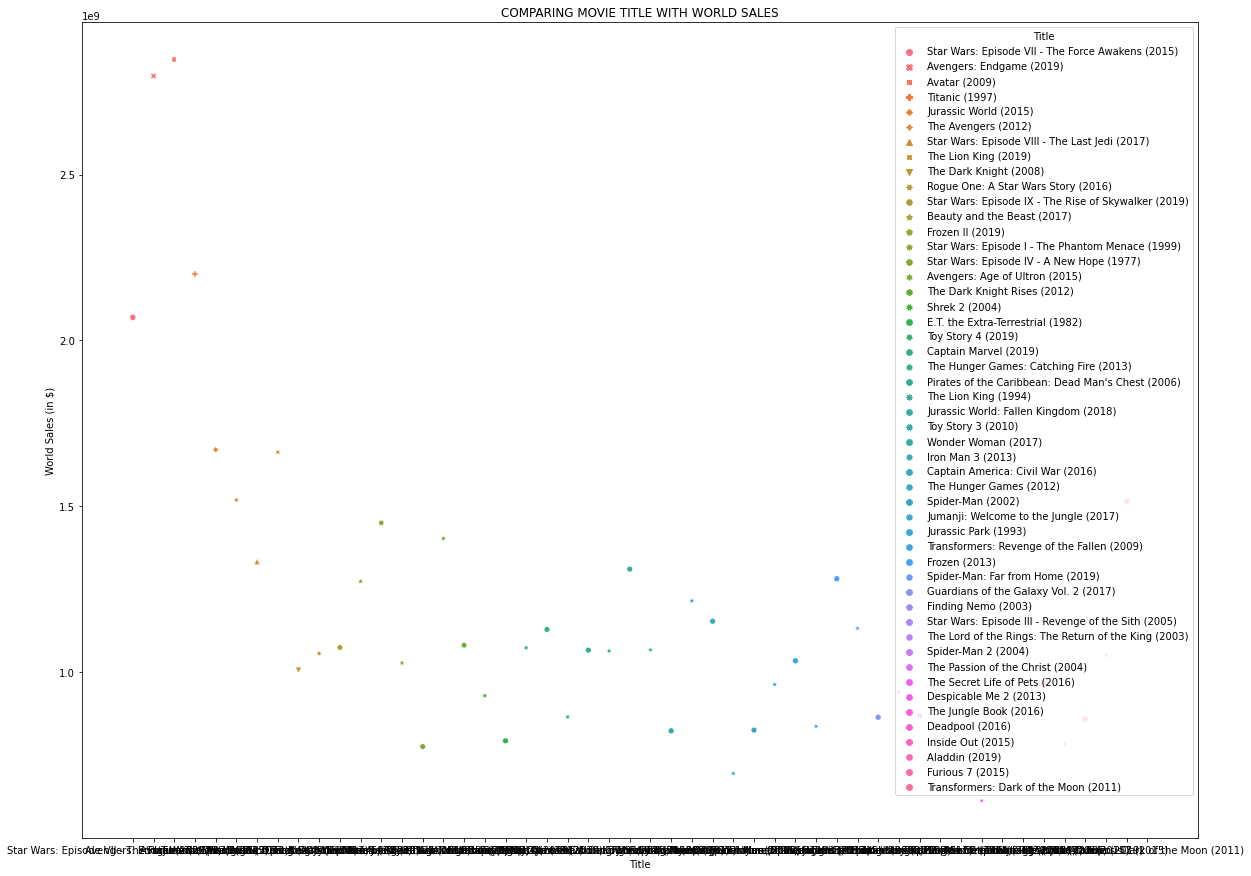

In [129]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Title',y="World Sales (in $)",data=m,hue='Title',style='Title')
plt.title('COMPARING MOVIE TITLE WITH WORLD SALES')
plt.show()

- Star Wars: Episode VII - The Force Awakens grossers highest in the collections in domestic sales.
- The Passion of the Christ grossers least in the domestic sales.

 ## Comparing Movie Title with World Sales (in $)

In [122]:
Movies4=Movies1.sort_values(by='World Sales (in $)',ascending=False)
N = Movies2.head(50)

In [124]:
N

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910.0,8.954576e+08,1.518816e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,123,2012
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
12,The Dark Knight (2008),Warner Bros.,534858444.0,4.711152e+08,1.005974e+09,'Action' 'Crime' 'Drama' 'Thriller',PG-13,123,2008
13,Rogue One: A Star Wars Story (2016),Walt Disney Studios Motion Pictures,532177324.0,5.238804e+08,1.056058e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,133,2016


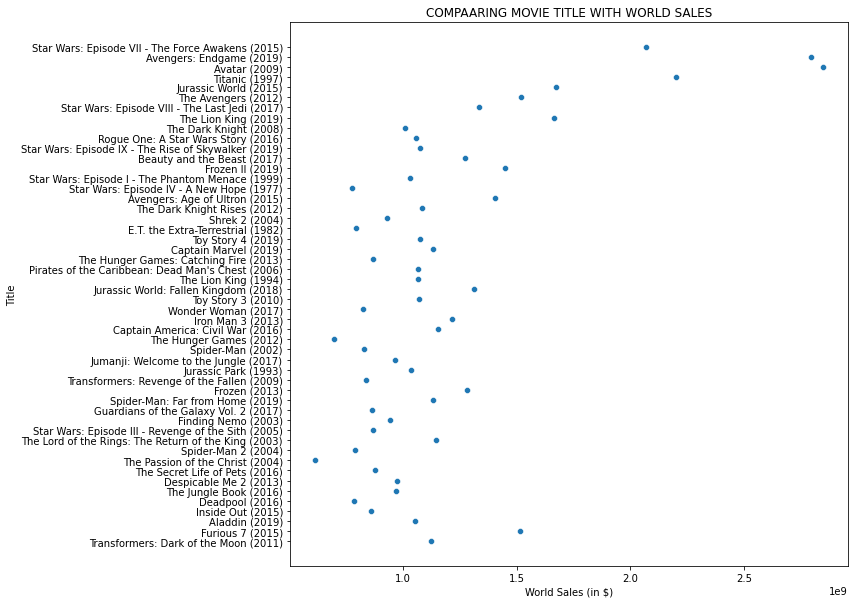

In [130]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='World Sales (in $)',y='Title',data=N)
plt.title('COMPAARING MOVIE TITLE WITH WORLD SALES')
plt.show()

- Star Wars: Episode VII - The Force Awakens grossers highest collection in world sales.
- Transformers: Dark of the Moon grossers least in the world sales. 

## COMPARING THE YEAR WITH THE WORLD SALES

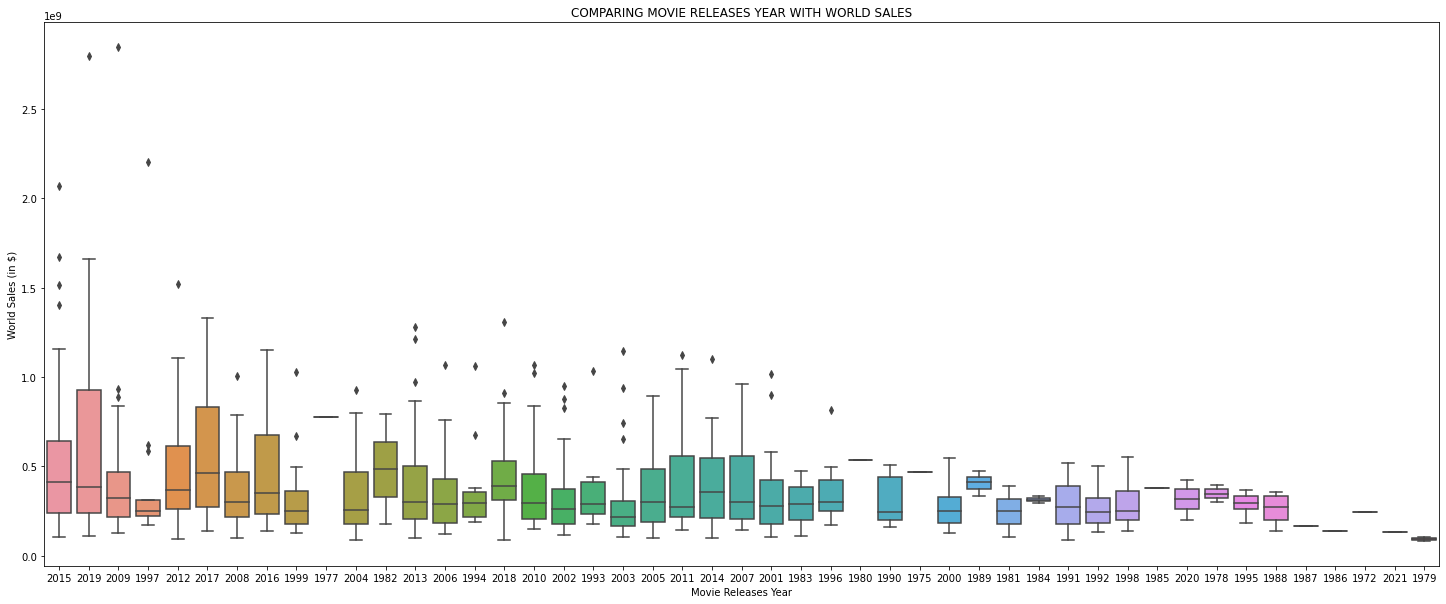

In [136]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Movie Releases Year',y='World Sales (in $)',data=Movies1)
plt.title('COMPARING MOVIE RELEASES YEAR WITH WORLD SALES')
plt.show()

- The outliers are more in 2003 years.
- The more outliers are in 2015,2019,2009,2013,2010,2002 and 2003 years.

## COMPARING THE MOVIE RUNTIME WITH THE WORLD SALES

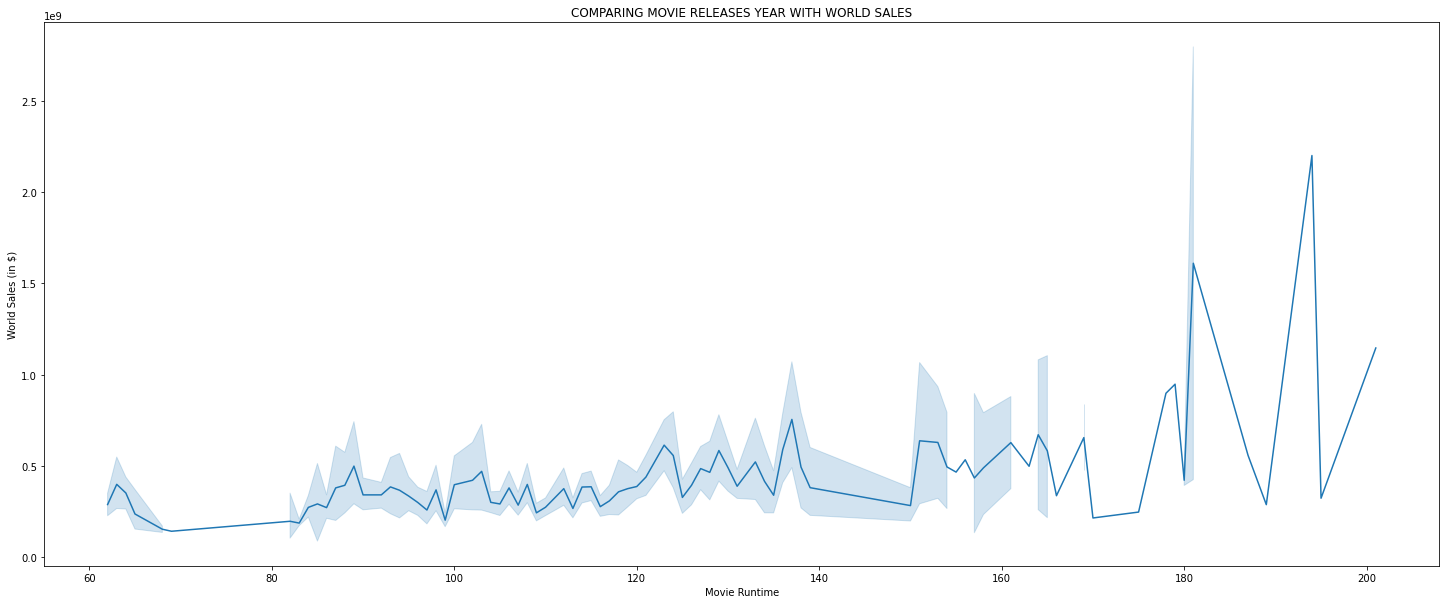

In [138]:
plt.figure(figsize=(25,10))
sns.lineplot(x='Movie Runtime',y='World Sales (in $)',data=Movies1)
plt.title('COMPARING MOVIE RELEASES YEAR WITH WORLD SALES')
plt.show()

- Most of the runtime are between 80 minutes to 150 minutes

## PROBLEM QUESTION

In [168]:
movies = Movies1[(Movies1['World Sales (in $)'] > 200000000) & (Movies1['International Sales (in $)'] > 600000000)]

In [169]:
movies

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,124,2009
6,Titanic (1997),Paramount Pictures,659363944.0,1.542283e+09,2.201647e+09,'Drama' 'Romance',PG-13,194,1997
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910.0,8.954576e+08,1.518816e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,123,2012
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
15,Beauty and the Beast (2017),Walt Disney Studios Motion Pictures,504481165.0,7.690951e+08,1.273576e+09,'Adventure' 'Family' 'Fantasy' 'Musical' 'Roma...,PG,129,2017
17,Frozen II (2019),Walt Disney Studios Motion Pictures,477373578.0,9.726534e+08,1.450027e+09,'Adventure' 'Animation' 'Comedy' 'Family' 'Fan...,PG,103,2019


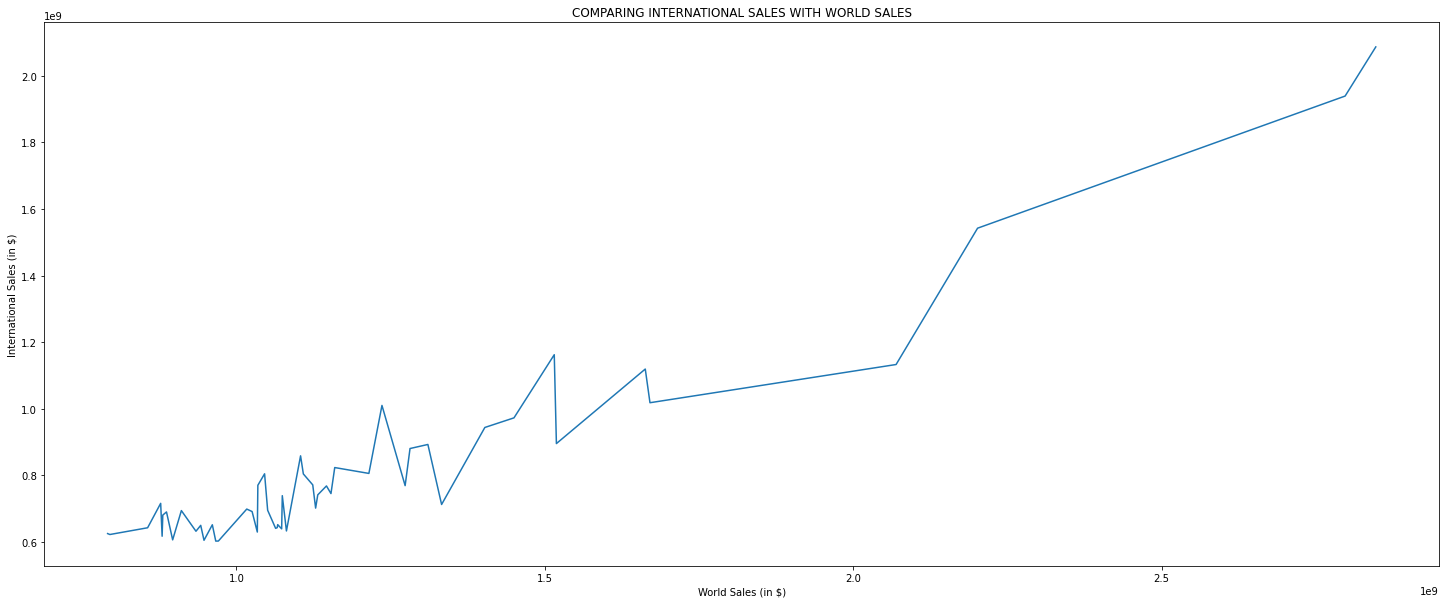

In [170]:
plt.figure(figsize=(25,10))
sns.lineplot(x='World Sales (in $)',y='International Sales (in $)',data=movies)
plt.title('COMPARING INTERNATIONAL SALES WITH WORLD SALES')
plt.show()

In [161]:
Movies1['Movie Releases Year'] = Movies1['Movie Releases Year'].astype(str).astype('int64')

In [176]:
movies1 = Movies1[(Movies1['World Sales (in $)'] > 200000000) & (Movies1['Movie Releases Year'] >= 2015)]

In [177]:
movies1

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Movie Runtime,Movie Releases Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,138,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,'Action' 'Adventure' 'Drama' 'Sci-Fi',PG-13,181,2019
7,Jurassic World (2015),Universal Pictures,652385625.0,1.018131e+09,1.670516e+09,'Action' 'Adventure' 'Sci-Fi',PG-13,124,2015
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures,620181382.0,7.125174e+08,1.332699e+09,'Action' 'Adventure' 'Fantasy' 'Sci-Fi',PG-13,123,2017
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043.0,1.119261e+09,1.662899e+09,'Adventure' 'Animation' 'Drama' 'Family' 'Musi...,PG,118,2019
...,...,...,...,...,...,...,...,...,...
857,Ferdinand (2017),Twentieth Century Fox,84410380.0,2.116588e+08,2.960692e+08,'Adventure' 'Animation' 'Comedy' 'Drama' 'Family',PG,108,2017
861,Birds of Prey (2020),Warner Bros.,84158461.0,1.177000e+08,2.018585e+08,'Action' 'Adventure' 'Comedy' 'Crime',R,109,2020
898,Teenage Mutant Ninja Turtles: Out of the Shado...,Paramount Pictures,82051601.0,1.635722e+08,2.456238e+08,'Action' 'Adventure' 'Comedy' 'Sci-Fi',PG-13,112,2016
901,Maze Runner: The Scorch Trials (2015),Twentieth Century Fox,81697192.0,2.305989e+08,3.122961e+08,'Action' 'Adventure' 'Sci-Fi' 'Thriller',PG-13,131,2015


## comparing movie year should be equal to 2015 and world sales be more than 200000000

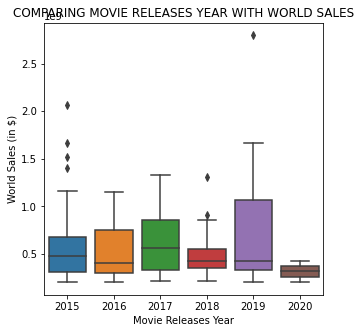

In [178]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Movie Releases Year',y='World Sales (in $)',data=movies1)
plt.title('COMPARING MOVIE RELEASES YEAR WITH WORLD SALES')
plt.show()

## CORRELATION

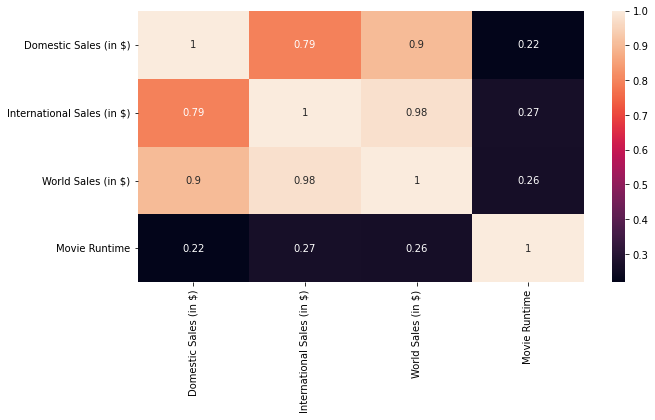

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(Movies1.corr(),annot=True)
plt.show()

## CONCULSION

- THE RUNTIME IS LESS ARE MORE PREFERRED.
- Walt Disney Studios Motion Pictures produces most the movies.
- From 2015 to 2019 has most of the higher grosser in the world sales.
- Star Wars: Episode VII - The Force Awakens grossers highest collection in world sales.
- WORLD SALES and International Sales are more correlated.
- PG-13 Licenses are more.